In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from datetime import datetime
from datetime import timedelta

In [2]:
sp500 = pd.read_csv('Data/^GSPC (S&P 500 max).csv', parse_dates=True, index_col='Date')
sp500 = sp500.rename(columns={'Adj Close': 'adjusted_close_price'})
sp500 = sp500[['adjusted_close_price']]
sp500.head()

,adjusted_close_price
Date,
1927-12-30,17.660000
1928-01-03,17.760000
1928-01-04,17.719999
1928-01-05,17.549999
1928-01-06,17.660000


In [3]:
sp500.shape

(23236, 1)

In [4]:
sp500.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 23236 entries, 1927-12-30 to 2020-07-02
Data columns (total 1 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   adjusted_close_price  23236 non-null  float64
dtypes: float64(1)
memory usage: 363.1 KB


In [5]:
sp500.isna().sum()

adjusted_close_price    0
dtype: int64

In [6]:
sp500.describe()

,adjusted_close_price
count,23236.000000
mean,476.194040
std,706.104550
min,4.400000
25%,23.780001
50%,99.279999
75%,802.777512
max,3386.149902


In [7]:
sp500 = sp500.assign(price_pct_change=sp500.pct_change())

In [8]:
sp500.head()

,adjusted_close_price,price_pct_change
Date,,
1927-12-30,17.660000,NaN
1928-01-03,17.760000,0.005663
1928-01-04,17.719999,-0.002252
1928-01-05,17.549999,-0.009594
1928-01-06,17.660000,0.006268


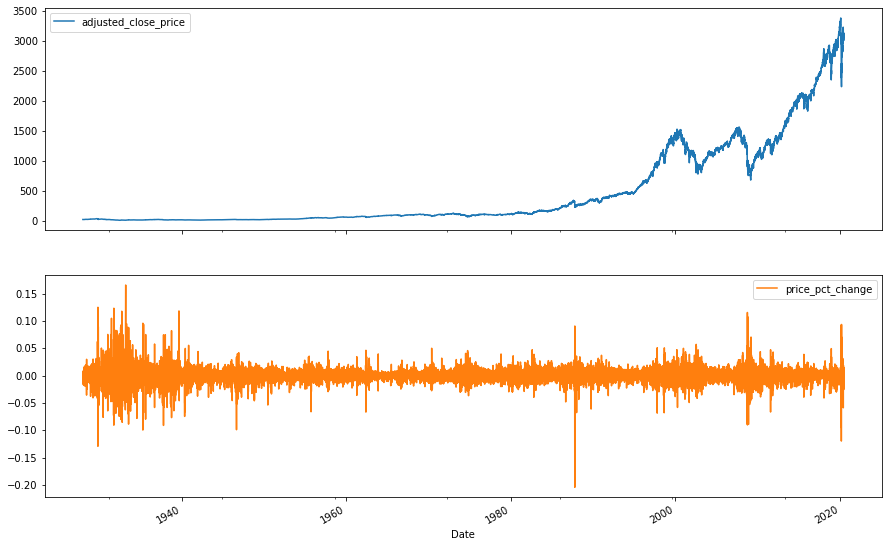

In [9]:
sp500.plot(subplots=True, figsize=(15,10));

## The dot.com crash

### Start date (has to be added manually)

In [10]:
start_date = '2000-03-27'

### Start price

In [11]:
start_price = sp500.loc[start_date]['adjusted_close_price']
start_price

1523.859985

### End date

In [12]:
end = sp500.loc[start_date:][sp500['adjusted_close_price'] > start_price].reset_index().head(1)
end_date = end['Date'].dt.strftime('%Y-%m-%d')
end_date = end_date[0]
end_date

<ipython-input-12-6cd7dd5f5aac>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  end = sp500.loc[start_date:][sp500['adjusted_close_price'] > start_price].reset_index().head(1)


'2007-05-21'

### End price

In [13]:
end_price = end.iloc[0]['adjusted_close_price']
end_price

1525.099976

### Days of recovery

In [14]:
timeframe = pd.to_datetime(end_date) - pd.to_datetime(start_date)
days_of_recovery = timeframe / np.timedelta64(1, 'D')

In [15]:
days_of_recovery

2611.0

### Months of recovery

In [16]:
months_of_recovery = timeframe / np.timedelta64(1, 'M')

In [17]:
months_of_recovery

85.78410234296392

### Years of recovery

In [18]:
years_of_recovery = timeframe / np.timedelta64(1, 'Y')

In [19]:
years_of_recovery

7.148675195246994

### Lowest price between end date and start date

In [20]:
lowest_price = sp500[start_date:end_date].min()['adjusted_close_price']
lowest_price

776.76001

### Lowest date

In [21]:
sp500.head()

,adjusted_close_price,price_pct_change
Date,,
1927-12-30,17.660000,NaN
1928-01-03,17.760000,0.005663
1928-01-04,17.719999,-0.002252
1928-01-05,17.549999,-0.009594
1928-01-06,17.660000,0.006268


In [22]:
lowest_date = sp500[start_date:end_date][sp500['adjusted_close_price'] == lowest_price]
lowest_date = lowest_date.reset_index()
lowest_date = lowest_date['Date'].dt.strftime('%Y-%m-%d')[0]
lowest_date

<ipython-input-22-045d65ff95a4>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lowest_date = sp500[start_date:end_date][sp500['adjusted_close_price'] == lowest_price]


'2002-10-09'

### Percentage lossbetween start price and lowest price

In [23]:
pct_loss = (lowest_price - start_price) / start_price
pct_loss

-0.49026812328824293

### Plot

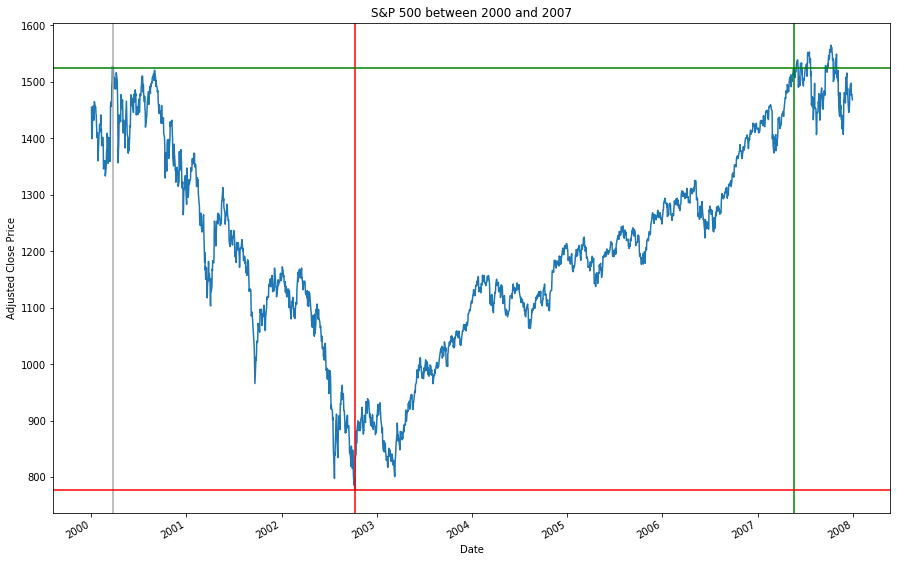

In [24]:
plot_periode = sp500[start_date[0:4]:end_date[0:4]]
plot = plot_periode['adjusted_close_price'].plot(kind='line', figsize=(15,10))
plot.axvline(start_date, color='darkgrey')
plot.axvline(lowest_date, color='r')
plot.axvline(end_date, color='g')
plot.axhline(start_price, color='g')
plot.axhline(lowest_price, color='r')
plt.ylabel('Adjusted Close Price')
plt.title(f'S&P 500 between {start_date[0:4]} and {end_date[0:4]}');

In [25]:
dictionary = {'year': start_date[0:4], 
              'start_date': start_date,
              'lowest_date': lowest_date,
              'end_date': end_date,
              'start_price': start_price,
              'lowest_price': lowest_price,
              'end_price': end_price,
              'days_of_recovery': days_of_recovery,
              'months_of_recovery': months_of_recovery,
              'years_of_recovery': years_of_recovery,
              'percentage_loss': pct_loss}

In [26]:
dictionary

{'year': '2000',
 'start_date': '2000-03-27',
 'lowest_date': '2002-10-09',
 'end_date': '2007-05-21',
 'start_price': 1523.859985,
 'lowest_price': 776.76001,
 'end_price': 1525.099976,
 'days_of_recovery': 2611.0,
 'months_of_recovery': 85.78410234296392,
 'years_of_recovery': 7.148675195246994,
 'percentage_loss': -0.49026812328824293}

In [27]:
df = pd.DataFrame([dictionary])
df

,year,start_date,lowest_date,end_date,start_price,lowest_price,end_price,days_of_recovery,months_of_recovery,years_of_recovery,percentage_loss
0,2000,2000-03-27,2002-10-09,2007-05-21,1523.859985,776.76001,1525.099976,2611.0,85.784102,7.148675,-0.490268


In [28]:
df2 = pd.DataFrame([dictionary])

In [29]:
df2

,year,start_date,lowest_date,end_date,start_price,lowest_price,end_price,days_of_recovery,months_of_recovery,years_of_recovery,percentage_loss
0,2000,2000-03-27,2002-10-09,2007-05-21,1523.859985,776.76001,1525.099976,2611.0,85.784102,7.148675,-0.490268


In [30]:
df3 = pd.concat([df, df2]).reset_index(drop=True)

In [31]:
df3

,year,start_date,lowest_date,end_date,start_price,lowest_price,end_price,days_of_recovery,months_of_recovery,years_of_recovery,percentage_loss
0,2000,2000-03-27,2002-10-09,2007-05-21,1523.859985,776.76001,1525.099976,2611.0,85.784102,7.148675,-0.490268
1,2000,2000-03-27,2002-10-09,2007-05-21,1523.859985,776.76001,1525.099976,2611.0,85.784102,7.148675,-0.490268


In [32]:
sp500 = pd.read_csv('Data/^GSPC (S&P 500 max).csv', parse_dates=True, index_col='Date')
sp500.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1927-12-30,17.660000,17.660000,17.660000,17.660000,17.660000,0
1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0
1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0
1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,0
1928-01-06,17.660000,17.660000,17.660000,17.660000,17.660000,0


In [33]:
#start_date = '2000-03-27'

In [34]:
def create_df(start_date, column):
    start_price = sp500.loc[start_date][column]
    
    end = sp500.loc[start_date:][sp500[column] > start_price].reset_index().head(1)
    end_date = end['Date'].dt.strftime('%Y-%m-%d')
    end_date = end_date[0]

    end_price = end.iloc[0][column]
    
    timeframe = pd.to_datetime(end_date) - pd.to_datetime(start_date)
    days_of_recovery = timeframe / np.timedelta64(1, 'D')
    months_of_recovery = timeframe / np.timedelta64(1, 'M')
    years_of_recovery = timeframe / np.timedelta64(1, 'Y')
    
    lowest_price = sp500[start_date:end_date].min()[column]
    
    lowest_date = sp500[start_date:end_date][sp500[column] == lowest_price]
    lowest_date = lowest_date.reset_index()
    lowest_date = lowest_date['Date'].dt.strftime('%Y-%m-%d')[0]
    
    abs_pct_loss = abs((lowest_price - start_price) / start_price)
    
    dictionary = {'year': start_date[0:4], 
              'start_date': start_date,
              'lowest_date': lowest_date,
              'end_date': end_date,
              'start_price': start_price,
              'lowest_price': lowest_price,
              'end_price': end_price,
              'days_of_recovery': days_of_recovery,
              'months_of_recovery': months_of_recovery,
              'years_of_recovery': years_of_recovery,
              'abs_percentage_loss': abs_pct_loss}
    
    df = pd.DataFrame([dictionary])
    return df

In [35]:
def create_plot(start_date, column):
    start_price = sp500.loc[start_date][column]
    
    end = sp500.loc[start_date:][sp500[column] > start_price].reset_index().head(1)
    end_date = end['Date'].dt.strftime('%Y-%m-%d')
    end_date = end_date[0]

    end_price = end.iloc[0][column]
    
    timeframe = pd.to_datetime(end_date) - pd.to_datetime(start_date)
    days_of_recovery = timeframe / np.timedelta64(1, 'D')
    months_of_recovery = timeframe / np.timedelta64(1, 'M')
    years_of_recovery = timeframe / np.timedelta64(1, 'Y')
    
    lowest_price = sp500[start_date:end_date].min()[column]
    
    lowest_date = sp500[start_date:end_date][sp500[column] == lowest_price]
    lowest_date = lowest_date.reset_index()
    lowest_date = lowest_date['Date'].dt.strftime('%Y-%m-%d')[0]
    
    plot_periode = sp500[start_date[0:4]:end_date[0:4]]
    plot = plot_periode[column].plot(kind='line', figsize=(15,10))
    plot.axvline(start_date, color='darkgrey')
    plot.axvline(lowest_date, color='r')
    plot.axvline(end_date, color='g')
    plot.axhline(start_price, color='g')
    plot.axhline(lowest_price, color='r')
    plt.ylabel('Adjusted Close Price')
    plt.title(f'S&P 500 between {start_date[0:4]} and {end_date[0:4]}');

In [36]:
first = create_df('2007-10-09', 'Adj Close')
first

<ipython-input-34-3df627dc20d6>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  end = sp500.loc[start_date:][sp500[column] > start_price].reset_index().head(1)
<ipython-input-34-3df627dc20d6>:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lowest_date = sp500[start_date:end_date][sp500[column] == lowest_price]


,year,start_date,lowest_date,end_date,start_price,lowest_price,end_price,days_of_recovery,months_of_recovery,years_of_recovery,abs_percentage_loss
0,2007,2007-10-09,2009-03-09,2013-03-28,1565.150024,676.530029,1569.189941,1997.0,65.611204,5.4676,0.567754


<ipython-input-35-1fd52ce5935e>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  end = sp500.loc[start_date:][sp500[column] > start_price].reset_index().head(1)
<ipython-input-35-1fd52ce5935e>:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lowest_date = sp500[start_date:end_date][sp500[column] == lowest_price]


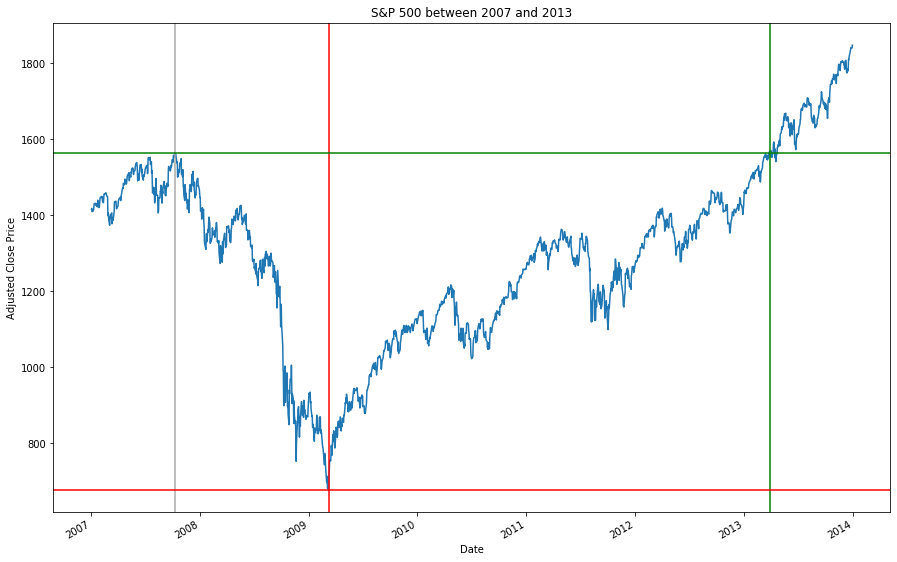

In [37]:
create_plot('2007-10-09', 'Adj Close')

In [38]:
second = create_df('2000-03-24', 'Adj Close')
second

<ipython-input-34-3df627dc20d6>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  end = sp500.loc[start_date:][sp500[column] > start_price].reset_index().head(1)
<ipython-input-34-3df627dc20d6>:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lowest_date = sp500[start_date:end_date][sp500[column] == lowest_price]


,year,start_date,lowest_date,end_date,start_price,lowest_price,end_price,days_of_recovery,months_of_recovery,years_of_recovery,abs_percentage_loss
0,2000,2000-03-24,2002-10-09,2007-05-30,1527.459961,776.76001,1530.22998,2623.0,86.178361,7.18153,0.491469


In [39]:
third = create_df('1990-07-16', 'Adj Close')
third

<ipython-input-34-3df627dc20d6>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  end = sp500.loc[start_date:][sp500[column] > start_price].reset_index().head(1)
<ipython-input-34-3df627dc20d6>:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lowest_date = sp500[start_date:end_date][sp500[column] == lowest_price]


,year,start_date,lowest_date,end_date,start_price,lowest_price,end_price,days_of_recovery,months_of_recovery,years_of_recovery,abs_percentage_loss
0,1990,1990-07-16,1990-10-11,1991-02-13,368.950012,295.459991,369.019989,212.0,6.965235,0.580436,0.199187


In [40]:
fourth = create_df('1987-08-25', 'Adj Close')
fourth

<ipython-input-34-3df627dc20d6>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  end = sp500.loc[start_date:][sp500[column] > start_price].reset_index().head(1)
<ipython-input-34-3df627dc20d6>:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lowest_date = sp500[start_date:end_date][sp500[column] == lowest_price]


,year,start_date,lowest_date,end_date,start_price,lowest_price,end_price,days_of_recovery,months_of_recovery,years_of_recovery,abs_percentage_loss
0,1987,1987-08-25,1987-12-04,1989-07-26,336.769989,223.919998,338.049988,701.0,23.031274,1.919273,0.335095


In [41]:
fifth = create_df('1980-11-28', 'Adj Close')
fifth

<ipython-input-34-3df627dc20d6>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  end = sp500.loc[start_date:][sp500[column] > start_price].reset_index().head(1)
<ipython-input-34-3df627dc20d6>:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lowest_date = sp500[start_date:end_date][sp500[column] == lowest_price]


,year,start_date,lowest_date,end_date,start_price,lowest_price,end_price,days_of_recovery,months_of_recovery,years_of_recovery,abs_percentage_loss
0,1980,1980-11-28,1982-08-12,1982-11-03,140.520004,102.419998,142.869995,705.0,23.162693,1.930224,0.271136


In [42]:
sixth = create_df('1973-01-11', 'Adj Close')
sixth

<ipython-input-34-3df627dc20d6>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  end = sp500.loc[start_date:][sp500[column] > start_price].reset_index().head(1)
<ipython-input-34-3df627dc20d6>:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lowest_date = sp500[start_date:end_date][sp500[column] == lowest_price]


,year,start_date,lowest_date,end_date,start_price,lowest_price,end_price,days_of_recovery,months_of_recovery,years_of_recovery,abs_percentage_loss
0,1973,1973-01-11,1974-10-03,1980-07-17,120.239998,62.279999,121.440002,2744.0,90.153802,7.512817,0.482036


In [43]:
seventh = create_df('1968-11-29', 'Adj Close')
seventh

<ipython-input-34-3df627dc20d6>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  end = sp500.loc[start_date:][sp500[column] > start_price].reset_index().head(1)
<ipython-input-34-3df627dc20d6>:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lowest_date = sp500[start_date:end_date][sp500[column] == lowest_price]


,year,start_date,lowest_date,end_date,start_price,lowest_price,end_price,days_of_recovery,months_of_recovery,years_of_recovery,abs_percentage_loss
0,1968,1968-11-29,1970-05-26,1972-03-06,108.370003,69.290001,108.769997,1193.0,39.195877,3.266323,0.360616


In [44]:
eighth = create_df('1966-02-09', 'Adj Close')
eighth

<ipython-input-34-3df627dc20d6>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  end = sp500.loc[start_date:][sp500[column] > start_price].reset_index().head(1)
<ipython-input-34-3df627dc20d6>:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lowest_date = sp500[start_date:end_date][sp500[column] == lowest_price]


,year,start_date,lowest_date,end_date,start_price,lowest_price,end_price,days_of_recovery,months_of_recovery,years_of_recovery,abs_percentage_loss
0,1966,1966-02-09,1966-10-07,1967-05-04,94.059998,73.199997,94.32,449.0,14.751843,1.22932,0.221773


In [45]:
ninth = create_df('1961-12-12', 'Adj Close')
ninth

<ipython-input-34-3df627dc20d6>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  end = sp500.loc[start_date:][sp500[column] > start_price].reset_index().head(1)
<ipython-input-34-3df627dc20d6>:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lowest_date = sp500[start_date:end_date][sp500[column] == lowest_price]


,year,start_date,lowest_date,end_date,start_price,lowest_price,end_price,days_of_recovery,months_of_recovery,years_of_recovery,abs_percentage_loss
0,1961,1961-12-12,1962-06-26,1963-09-03,72.639999,52.32,72.660004,630.0,20.698577,1.724881,0.279736


In [46]:
tenth = create_df('1956-08-02', 'Adj Close')
tenth

<ipython-input-34-3df627dc20d6>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  end = sp500.loc[start_date:][sp500[column] > start_price].reset_index().head(1)
<ipython-input-34-3df627dc20d6>:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lowest_date = sp500[start_date:end_date][sp500[column] == lowest_price]


,year,start_date,lowest_date,end_date,start_price,lowest_price,end_price,days_of_recovery,months_of_recovery,years_of_recovery,abs_percentage_loss
0,1956,1956-08-02,1957-10-22,1958-09-24,49.639999,38.98,49.779999,783.0,25.725374,2.143781,0.214746


In [47]:
eleventh = create_df('1929-09-16', 'Adj Close')
eleventh

<ipython-input-34-3df627dc20d6>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  end = sp500.loc[start_date:][sp500[column] > start_price].reset_index().head(1)
<ipython-input-34-3df627dc20d6>:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lowest_date = sp500[start_date:end_date][sp500[column] == lowest_price]


,year,start_date,lowest_date,end_date,start_price,lowest_price,end_price,days_of_recovery,months_of_recovery,years_of_recovery,abs_percentage_loss
0,1929,1929-09-16,1932-06-01,1954-09-22,31.860001,4.4,32.0,9137.0,300.195076,25.016256,0.861896


<ipython-input-35-1fd52ce5935e>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  end = sp500.loc[start_date:][sp500[column] > start_price].reset_index().head(1)
<ipython-input-35-1fd52ce5935e>:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lowest_date = sp500[start_date:end_date][sp500[column] == lowest_price]


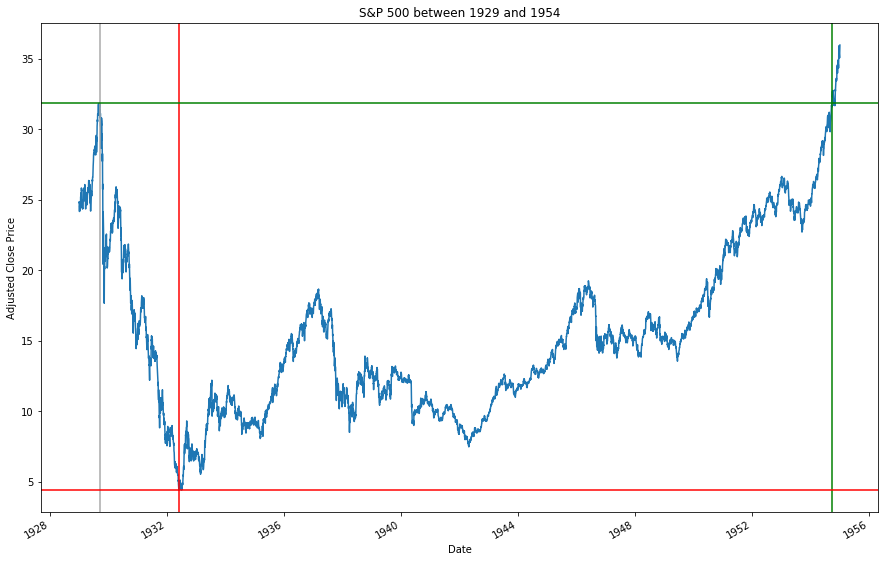

In [48]:
create_plot('1929-09-16', 'Adj Close')

In [49]:
all_recessions_df = (pd.concat([first, 
                                second, 
                                third, 
                                fourth, 
                                fifth, 
                                sixth, 
                                seventh, 
                                eighth, 
                                ninth, 
                                tenth, 
                                eleventh]).reset_index(drop=True)) #fourteenth (great depression is out)

In [50]:
all_recessions_df.sort_values(by=['start_date'])

,year,start_date,lowest_date,end_date,start_price,lowest_price,end_price,days_of_recovery,months_of_recovery,years_of_recovery,abs_percentage_loss
10,1929,1929-09-16,1932-06-01,1954-09-22,31.860001,4.400000,32.000000,9137.0,300.195076,25.016256,0.861896
9,1956,1956-08-02,1957-10-22,1958-09-24,49.639999,38.980000,49.779999,783.0,25.725374,2.143781,0.214746
8,1961,1961-12-12,1962-06-26,1963-09-03,72.639999,52.320000,72.660004,630.0,20.698577,1.724881,0.279736
7,1966,1966-02-09,1966-10-07,1967-05-04,94.059998,73.199997,94.320000,449.0,14.751843,1.229320,0.221773
6,1968,1968-11-29,1970-05-26,1972-03-06,108.370003,69.290001,108.769997,1193.0,39.195877,3.266323,0.360616
5,1973,1973-01-11,1974-10-03,1980-07-17,120.239998,62.279999,121.440002,2744.0,90.153802,7.512817,0.482036
4,1980,1980-11-28,1982-08-12,1982-11-03,140.520004,102.419998,142.869995,705.0,23.162693,1.930224,0.271136
3,1987,1987-08-25,1987-12-04,1989-07-26,336.769989,223.919998,338.049988,701.0,23.031274,1.919273,0.335095
2,1990,1990-07-16,1990-10-11,1991-02-13,368.950012,295.459991,369.019989,212.0,6.965235,0.580436,0.199187
1,2000,2000-03-24,2002-10-09,2007-05-30,1527.459961,776.760010,1530.229980,2623.0,86.178361,7.181530,0.491469


## I cannot find any data in yahoo finance before December 1940 

### Check the downloaded sp500 DataFrame before 1940

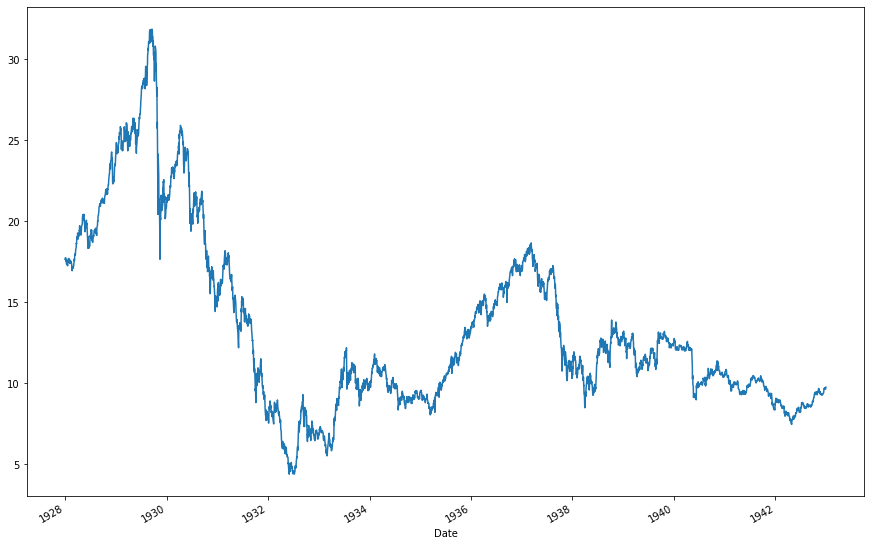

In [51]:
sp500_1927_42_plot = sp500['1927':'1942']['Adj Close'].plot(figsize=(15,10))
sp500_1927_42_plot;

In [52]:
sp500_1927_42 = sp500['1927':'1942']

In [53]:
sp500_1927_42_max = sp500_1927_42['Adj Close'].max()

In [54]:
sp500_1927_42[sp500_1927_42['Adj Close'] == sp500_1927_42_max]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1929-09-16,31.860001,31.860001,31.860001,31.860001,31.860001,0


In [55]:
sp500_1936_38 = sp500['1936':'1938']

In [56]:
sp500_1936_38_max = sp500_1936_38['Adj Close'].max()

In [57]:
sp500_1936_38[sp500_1936_38['Adj Close'] == sp500_1936_38_max]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1937-03-10,18.67,18.67,18.67,18.67,18.67,0


### Save the new DataFrame

In [58]:
all_recessions_df.to_csv('Data/all_recessions_without_new_lows_df.csv', index=None)

In [59]:
check = pd.read_csv('Data/all_recessions_without_new_lows_df.csv')
check.head()

,year,start_date,lowest_date,end_date,start_price,lowest_price,end_price,days_of_recovery,months_of_recovery,years_of_recovery,abs_percentage_loss
0,2007,2007-10-09,2009-03-09,2013-03-28,1565.150024,676.530029,1569.189941,1997.0,65.611204,5.467600,0.567754
1,2000,2000-03-24,2002-10-09,2007-05-30,1527.459961,776.760010,1530.229980,2623.0,86.178361,7.181530,0.491469
2,1990,1990-07-16,1990-10-11,1991-02-13,368.950012,295.459991,369.019989,212.0,6.965235,0.580436,0.199187
3,1987,1987-08-25,1987-12-04,1989-07-26,336.769989,223.919998,338.049988,701.0,23.031274,1.919273,0.335095
4,1980,1980-11-28,1982-08-12,1982-11-03,140.520004,102.419998,142.869995,705.0,23.162693,1.930224,0.271136


## Regression analysis

In [60]:
all_recessions_df.tail()

,year,start_date,lowest_date,end_date,start_price,lowest_price,end_price,days_of_recovery,months_of_recovery,years_of_recovery,abs_percentage_loss
6,1968,1968-11-29,1970-05-26,1972-03-06,108.370003,69.290001,108.769997,1193.0,39.195877,3.266323,0.360616
7,1966,1966-02-09,1966-10-07,1967-05-04,94.059998,73.199997,94.320000,449.0,14.751843,1.229320,0.221773
8,1961,1961-12-12,1962-06-26,1963-09-03,72.639999,52.320000,72.660004,630.0,20.698577,1.724881,0.279736
9,1956,1956-08-02,1957-10-22,1958-09-24,49.639999,38.980000,49.779999,783.0,25.725374,2.143781,0.214746
10,1929,1929-09-16,1932-06-01,1954-09-22,31.860001,4.400000,32.000000,9137.0,300.195076,25.016256,0.861896


#### Create a constant

In [61]:
all_recessions_df = sm.add_constant(all_recessions_df)
all_recessions_df.head()

,const,year,start_date,lowest_date,end_date,start_price,lowest_price,end_price,days_of_recovery,months_of_recovery,years_of_recovery,abs_percentage_loss
0,1.0,2007,2007-10-09,2009-03-09,2013-03-28,1565.150024,676.530029,1569.189941,1997.0,65.611204,5.467600,0.567754
1,1.0,2000,2000-03-24,2002-10-09,2007-05-30,1527.459961,776.760010,1530.229980,2623.0,86.178361,7.181530,0.491469
2,1.0,1990,1990-07-16,1990-10-11,1991-02-13,368.950012,295.459991,369.019989,212.0,6.965235,0.580436,0.199187
3,1.0,1987,1987-08-25,1987-12-04,1989-07-26,336.769989,223.919998,338.049988,701.0,23.031274,1.919273,0.335095
4,1.0,1980,1980-11-28,1982-08-12,1982-11-03,140.520004,102.419998,142.869995,705.0,23.162693,1.930224,0.271136


### Run OLS to estimate the regression coefficients

### Model 1

In [62]:
y = all_recessions_df['days_of_recovery']
X = all_recessions_df[['const', 'abs_percentage_loss']]

lin_reg_model = sm.OLS(y,X)
results = lin_reg_model.fit()
results.summary()

/Users/robertbozsik/opt/miniconda3/envs/boogie_woogie/lib/python3.8/site-packages/scipy/stats/stats.py:1534: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       days_of_recovery   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     55.47
Date:                Thu, 09 Jul 2020   Prob (F-statistic):           3.90e-05
Time:                        19:54:57   Log-Likelihood:                -90.517
No. Observations:                  11   AIC:                             185.0
Df Residuals:                       9   BIC:                             185.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -2682.2109    688.472     -3.896      0.004   -4239.644   -1124.778
abs_percentage_loss  1.183e+04   1587.773      7.448      0.000    8233.895    1.54e+04
==============================================================================
Omnibus:                        2.044   Durbin-Watson:                   0.871
Prob(Omnibus):                  0.360   Jarque-Bera (JB):                0.393
Skew:                          -0.419   Prob(JB):                        0.821
Kurtosis:                       3.394   Cond. No.                         6.08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Plot the results

In [63]:
predictions1 = results.predict(X)

In [64]:
all_recessions_df = all_recessions_df.assign(pred_days_of_recovery1=predictions1)
all_recessions_df.head()

,const,year,start_date,lowest_date,end_date,start_price,lowest_price,end_price,days_of_recovery,months_of_recovery,years_of_recovery,abs_percentage_loss,pred_days_of_recovery1
0,1.0,2007,2007-10-09,2009-03-09,2013-03-28,1565.150024,676.530029,1569.189941,1997.0,65.611204,5.467600,0.567754,4031.867913
1,1.0,2000,2000-03-24,2002-10-09,2007-05-30,1527.459961,776.760010,1530.229980,2623.0,86.178361,7.181530,0.491469,3129.752602
2,1.0,1990,1990-07-16,1990-10-11,1991-02-13,368.950012,295.459991,369.019989,212.0,6.965235,0.580436,0.199187,-326.688890
3,1.0,1987,1987-08-25,1987-12-04,1989-07-26,336.769989,223.919998,338.049988,701.0,23.031274,1.919273,0.335095,1280.518995
4,1.0,1980,1980-11-28,1982-08-12,1982-11-03,140.520004,102.419998,142.869995,705.0,23.162693,1.930224,0.271136,524.155991


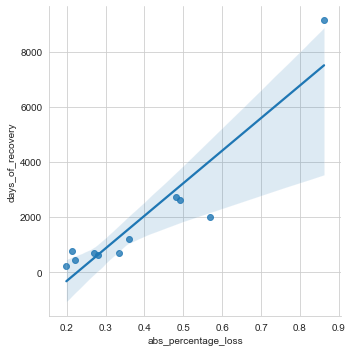

In [65]:
sns.set_style('whitegrid')
sns.lmplot(x ='abs_percentage_loss', y ='days_of_recovery', data = all_recessions_df);

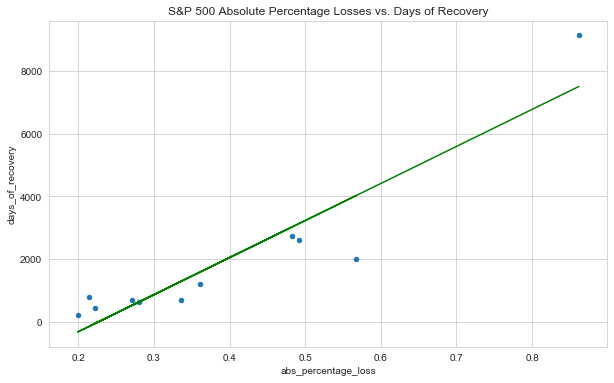

In [66]:
all_recessions_df.plot(kind='scatter', x='abs_percentage_loss', y='days_of_recovery', figsize=(10,6))
plt.plot(all_recessions_df['abs_percentage_loss'], all_recessions_df['pred_days_of_recovery1'], color='green')
plt.title(f'S&P 500 Absolute Percentage Losses vs. Days of Recovery');

### Make a prediction for the days of recovery of S&P 500 in the Covid-19 situation 

**prediction 1 (with the linear regression model)**

$y = b_0 + b_1 * x_1$

In [67]:
results.params

const                  -2682.210917
abs_percentage_loss    11825.685559
dtype: float64

In [68]:
beta0 = results.params[0] # intercept
beta0

-2682.2109170854956

In [69]:
beta1 = results.params[1] # slope
beta1

11825.685558830988

In [70]:
def lin_reg_model(x):
    y = beta0 + beta1 * x
    return y

In [71]:
covid_recovery = lin_reg_model(0.339)
covid_recovery

1326.6964873582097

In [72]:
print(f'''The recovery of the S&P 500 stock price recession will take: 
 - in days: {round(covid_recovery, 2)} days, 
 - in months: {round(covid_recovery / 30, 2)} months, 
 - in years: {round(covid_recovery / 365, 2)} years''')

The recovery of the S&P 500 stock price recession will take: 
 - in days: 1326.7 days, 
 - in months: 44.22 months, 
 - in years: 3.63 years


**confidence intervall or prediction interval???**

In [73]:
results.conf_int()

,0,1
const,-4239.643735,-1124.778099
abs_percentage_loss,8233.894502,15417.476616


In [74]:
t_crit = 2.16 # https://www.stat.colostate.edu/inmem/gumina/st201/pdf/Utts-Heckard_t-Table.pdf

In [75]:
from scipy.stats import sem

In [76]:
se = sem(all_recessions_df['pred_days_of_recovery1']) # standard error
se

711.8982890385248

In [77]:
lower_ci = covid_recovery - t_crit * se
lower_ci

-211.00381696500403

In [78]:
higher_ci = covid_recovery + t_crit * se
higher_ci

2864.3967916814236

### Model 2 (Quadratic line / Polynomial Linear Regression)

In [79]:
all_recessions_df.head()

,const,year,start_date,lowest_date,end_date,start_price,lowest_price,end_price,days_of_recovery,months_of_recovery,years_of_recovery,abs_percentage_loss,pred_days_of_recovery1
0,1.0,2007,2007-10-09,2009-03-09,2013-03-28,1565.150024,676.530029,1569.189941,1997.0,65.611204,5.467600,0.567754,4031.867913
1,1.0,2000,2000-03-24,2002-10-09,2007-05-30,1527.459961,776.760010,1530.229980,2623.0,86.178361,7.181530,0.491469,3129.752602
2,1.0,1990,1990-07-16,1990-10-11,1991-02-13,368.950012,295.459991,369.019989,212.0,6.965235,0.580436,0.199187,-326.688890
3,1.0,1987,1987-08-25,1987-12-04,1989-07-26,336.769989,223.919998,338.049988,701.0,23.031274,1.919273,0.335095,1280.518995
4,1.0,1980,1980-11-28,1982-08-12,1982-11-03,140.520004,102.419998,142.869995,705.0,23.162693,1.930224,0.271136,524.155991


In [80]:
abs_perc_loss_squared = all_recessions_df['abs_percentage_loss'] ** 2
all_recessions_df = all_recessions_df.assign(abs_per_loss_squared=abs_perc_loss_squared)
all_recessions_df.head()

,const,year,start_date,lowest_date,end_date,start_price,lowest_price,end_price,days_of_recovery,months_of_recovery,years_of_recovery,abs_percentage_loss,pred_days_of_recovery1,abs_per_loss_squared
0,1.0,2007,2007-10-09,2009-03-09,2013-03-28,1565.150024,676.530029,1569.189941,1997.0,65.611204,5.467600,0.567754,4031.867913,0.322344
1,1.0,2000,2000-03-24,2002-10-09,2007-05-30,1527.459961,776.760010,1530.229980,2623.0,86.178361,7.181530,0.491469,3129.752602,0.241542
2,1.0,1990,1990-07-16,1990-10-11,1991-02-13,368.950012,295.459991,369.019989,212.0,6.965235,0.580436,0.199187,-326.688890,0.039675
3,1.0,1987,1987-08-25,1987-12-04,1989-07-26,336.769989,223.919998,338.049988,701.0,23.031274,1.919273,0.335095,1280.518995,0.112289
4,1.0,1980,1980-11-28,1982-08-12,1982-11-03,140.520004,102.419998,142.869995,705.0,23.162693,1.930224,0.271136,524.155991,0.073515


In [81]:
y = all_recessions_df['days_of_recovery']
X = all_recessions_df[['const', 'abs_percentage_loss', 'abs_per_loss_squared']]

quad_reg_model = sm.OLS(y,X)
results_q = quad_reg_model.fit()
results_q.summary()

/Users/robertbozsik/opt/miniconda3/envs/boogie_woogie/lib/python3.8/site-packages/scipy/stats/stats.py:1534: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       days_of_recovery   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     112.0
Date:                Thu, 09 Jul 2020   Prob (F-statistic):           1.41e-06
Time:                        19:55:02   Log-Likelihood:                -82.825
No. Observations:                  11   AIC:                             171.7
Df Residuals:                       8   BIC:                             172.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1291.2289    882.574      1.463      0.182    -743.990    3326.447
abs_percentage_loss  -7675.4029   4036.166     -1.902      0.094    -1.7e+04    1632.012
abs_per_loss_squared  1.927e+04   3902.543      4.939      0.001    1.03e+04    2.83e+04
==============================================================================
Omnibus:                        7.809   Durbin-Watson:                   1.787
Prob(Omnibus):                  0.020   Jarque-Bera (JB):                3.274
Skew:                          -1.129   Prob(JB):                        0.195
Kurtosis:                       4.429   Cond. No.                         38.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Plot the results

In [82]:
predictions2 = results_q.predict(X)

In [83]:
all_recessions_df = all_recessions_df.assign(pred_days_of_recovery2=predictions2)
all_recessions_df = all_recessions_df.sort_values(by=['start_date'])
all_recessions_df

,const,year,start_date,lowest_date,end_date,start_price,lowest_price,end_price,days_of_recovery,months_of_recovery,years_of_recovery,abs_percentage_loss,pred_days_of_recovery1,abs_per_loss_squared,pred_days_of_recovery2
10,1.0,1929,1929-09-16,1932-06-01,1954-09-22,31.860001,4.400000,32.000000,9137.0,300.195076,25.016256,0.861896,7510.297780,0.742864,8994.091923
9,1.0,1956,1956-08-02,1957-10-22,1958-09-24,49.639999,38.980000,49.779999,783.0,25.725374,2.143781,0.214746,-142.690394,0.046116,531.821902
8,1.0,1961,1961-12-12,1962-06-26,1963-09-03,72.639999,52.320000,72.660004,630.0,20.698577,1.724881,0.279736,625.855190,0.078252,652.405707
7,1.0,1966,1966-02-09,1966-10-07,1967-05-04,94.059998,73.199997,94.320000,449.0,14.751843,1.229320,0.221773,-59.588997,0.049183,537.009701
6,1.0,1968,1968-11-29,1970-05-26,1972-03-06,108.370003,69.290001,108.769997,1193.0,39.195877,3.266323,0.360616,1582.325417,0.130044,1029.875771
5,1.0,1973,1973-01-11,1974-10-03,1980-07-17,120.239998,62.279999,121.440002,2744.0,90.153802,7.512817,0.482036,3018.194394,0.232359,2069.980860
4,1.0,1980,1980-11-28,1982-08-12,1982-11-03,140.520004,102.419998,142.869995,705.0,23.162693,1.930224,0.271136,524.155991,0.073515,627.102252
3,1.0,1987,1987-08-25,1987-12-04,1989-07-26,336.769989,223.919998,338.049988,701.0,23.031274,1.919273,0.335095,1280.518995,0.112289,883.536446
2,1.0,1990,1990-07-16,1990-10-11,1991-02-13,368.950012,295.459991,369.019989,212.0,6.965235,0.580436,0.199187,-326.688890,0.039675,527.108911
1,1.0,2000,2000-03-24,2002-10-09,2007-05-30,1527.459961,776.760010,1530.229980,2623.0,86.178361,7.181530,0.491469,3129.752602,0.241542,2174.583129


**Save the new DataFrame**

In [84]:
all_recessions_df.to_csv('Data/all_recessions_with_predictions_df.csv', index=None)

In [85]:
check = pd.read_csv('Data/all_recessions_with_predictions_df.csv')
check.head()

,const,year,start_date,lowest_date,end_date,start_price,lowest_price,end_price,days_of_recovery,months_of_recovery,years_of_recovery,abs_percentage_loss,pred_days_of_recovery1,abs_per_loss_squared,pred_days_of_recovery2
0,1.0,1929,1929-09-16,1932-06-01,1954-09-22,31.860001,4.400000,32.000000,9137.0,300.195076,25.016256,0.861896,7510.297780,0.742864,8994.091923
1,1.0,1956,1956-08-02,1957-10-22,1958-09-24,49.639999,38.980000,49.779999,783.0,25.725374,2.143781,0.214746,-142.690394,0.046116,531.821902
2,1.0,1961,1961-12-12,1962-06-26,1963-09-03,72.639999,52.320000,72.660004,630.0,20.698577,1.724881,0.279736,625.855190,0.078252,652.405707
3,1.0,1966,1966-02-09,1966-10-07,1967-05-04,94.059998,73.199997,94.320000,449.0,14.751843,1.229320,0.221773,-59.588997,0.049183,537.009701
4,1.0,1968,1968-11-29,1970-05-26,1972-03-06,108.370003,69.290001,108.769997,1193.0,39.195877,3.266323,0.360616,1582.325417,0.130044,1029.875771


In [86]:
all_recessions_df = all_recessions_df.sort_values(by=['abs_percentage_loss'])
all_recessions_df.head()

,const,year,start_date,lowest_date,end_date,start_price,lowest_price,end_price,days_of_recovery,months_of_recovery,years_of_recovery,abs_percentage_loss,pred_days_of_recovery1,abs_per_loss_squared,pred_days_of_recovery2
2,1.0,1990,1990-07-16,1990-10-11,1991-02-13,368.950012,295.459991,369.019989,212.0,6.965235,0.580436,0.199187,-326.688890,0.039675,527.108911
9,1.0,1956,1956-08-02,1957-10-22,1958-09-24,49.639999,38.980000,49.779999,783.0,25.725374,2.143781,0.214746,-142.690394,0.046116,531.821902
7,1.0,1966,1966-02-09,1966-10-07,1967-05-04,94.059998,73.199997,94.320000,449.0,14.751843,1.229320,0.221773,-59.588997,0.049183,537.009701
4,1.0,1980,1980-11-28,1982-08-12,1982-11-03,140.520004,102.419998,142.869995,705.0,23.162693,1.930224,0.271136,524.155991,0.073515,627.102252
8,1.0,1961,1961-12-12,1962-06-26,1963-09-03,72.639999,52.320000,72.660004,630.0,20.698577,1.724881,0.279736,625.855190,0.078252,652.405707


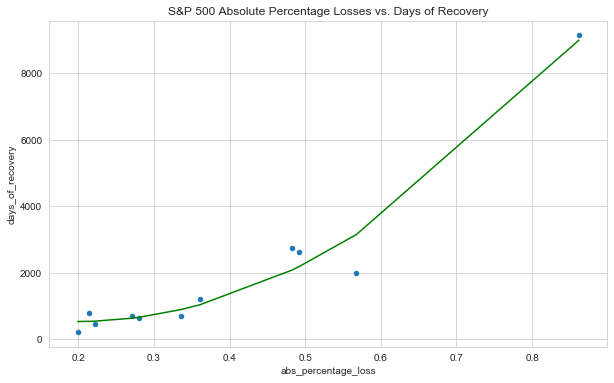

In [87]:
all_recessions_df.plot(kind='scatter', x='abs_percentage_loss', y='days_of_recovery', figsize=(10,6))
plt.plot(all_recessions_df['abs_percentage_loss'], all_recessions_df['pred_days_of_recovery2'], color='green')
plt.title(f'S&P 500 Absolute Percentage Losses vs. Days of Recovery');

### Make a prediction for the days of recovery of S&P 500 in the Covid-19 situation 

**prediction 2 (with the polynomial regression model)**

$y = b_0 + b_1 * x_1 + b_2 * x_1^2$

In [88]:
results_q.params

const                    1291.228920
abs_percentage_loss     -7675.402894
abs_per_loss_squared    19274.394004
dtype: float64

In [89]:
beta0 = results_q.params[0] # intercept
beta0

1291.2289201771305

In [90]:
beta1 = results_q.params[1]
beta1

-7675.402893600094

In [91]:
beta2 = results_q.params[2]
beta2

19274.39400442835

In [92]:
def quad_reg_model(x):
    y = beta0 + beta1 * x + beta2 * x**2
    return y

In [93]:
covid_recovery = quad_reg_model(0.339)
covid_recovery

904.2999726296093

In [98]:
covid_start = pd.to_datetime('2020-02-19')
covid_start

Timestamp('2020-02-19 00:00:00')

In [99]:
covid_end = covid_start + timedelta(days=covid_recovery)
covid_end

Timestamp('2022-08-11 07:11:57.635198')

In [101]:
end = sp500.loc[start_date:][sp500['Adj Close'] > start_price].reset_index().head(1)
end_date = end['Date'].dt.strftime('%Y-%m-%d')
end_date = end_date[0]
end_date

<ipython-input-101-bc3ab38d15cd>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  end = sp500.loc[start_date:][sp500['Adj Close'] > start_price].reset_index().head(1)


'2007-05-21'

In [110]:
covid_start_string = f'{str(covid_start.year)}-0{str(covid_start.month)}-{str(covid_start.day)}'
covid_start_string

'2020-02-19'

In [111]:
covid_end_string = f'{str(covid_end.year)}-0{str(covid_end.month)}-{str(covid_end.day)}'
covid_end_string

'2022-08-11'

In [116]:
print(f'''Based on our model (Adj. R-squared: 0.957) the recovery of the S&P 500 stock price recession will take: 
 - in days: {round(covid_recovery, 2)} days, 
 - in months: {round(covid_recovery / 30, 2)} months, 
 - in years: {round(covid_recovery / 365, 2)} years.
The recession started on {covid_start_string} and will last until {covid_end_string}.
Save the date! :)
Silviu & Robert''')

Based on our model (Adj. R-squared: 0.957) the recovery of the S&P 500 stock price recession will take: 
 - in days: 904.3 days, 
 - in months: 30.14 months, 
 - in years: 2.48 years.
The recession started on 2020-02-19 and will last until 2022-08-11.
Save the date! :)
Silviu & Robert
